In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = '/srv/scratch6/kew/ats/data/en/newsela_article_corpus_2016-01-29/articles_metadata_en_splits.csv'
df = pd.read_csv(file, header=0)
df['simp_level'] = df['filename'].apply(lambda x: x.split('.')[-2])
df

,slug,language,title,grade_level,version,filename,split,simp_level
0,10dollarbill-woman,en,"Tubman, Perkins or Roosevelt? Woman on $10 bil...",12.0,0,10dollarbill-woman.en.0.txt,train,0
1,10dollarbill-woman,en,Americans weigh in to choose the woman who wil...,8.0,1,10dollarbill-woman.en.1.txt,train,1
2,10dollarbill-woman,en,The $10 question: Who will be the new face on ...,6.0,2,10dollarbill-woman.en.2.txt,train,2
3,10dollarbill-woman,en,New $10 bill will have a theme and a woman's p...,5.0,3,10dollarbill-woman.en.3.txt,train,3
4,10dollarbill-woman,en,We will soon have an American woman's face on ...,3.0,4,10dollarbill-woman.en.4.txt,train,4
...,...,...,...,...,...,...,...,...
9560,zuckerberg-internet,en,Facebook CEO steps into public issues with glo...,12.0,0,zuckerberg-internet.en.0.txt,train,0
9561,zuckerberg-internet,en,Post this to your page: Facebook CEO wants to ...,9.0,1,zuckerberg-internet.en.1.txt,train,1
9562,zuckerberg-internet,en,"Facebook CEO hits ""share"" to help bring the 'N...",7.0,2,zuckerberg-internet.en.2.txt,train,2
9563,zuckerberg-internet,en,"Zuckerberg hopes people hit ""like"" on his glob...",5.0,3,zuckerberg-internet.en.3.txt,train,3


In [3]:
# df['version'] == df['simp_level']

In [4]:
df.groupby('simp_level')['grade_level'].unique()

simp_level
0    [12.0, 9.0, 8.0, 10.0, 6.0, 11.0]
1      [8.0, 9.0, 7.0, 6.0, 10.0, 5.0]
2            [6.0, 7.0, 8.0, 5.0, 4.0]
3            [5.0, 4.0, 6.0, 3.0, 7.0]
4                 [3.0, 2.0, 4.0, 5.0]
5                           [2.0, 3.0]
Name: grade_level, dtype: object

In [7]:
df['grade_level'].value_counts()

12.0    1853
4.0     1569
5.0     1342
7.0     1210
6.0     1058
8.0     1037
9.0      750
3.0      500
2.0      224
10.0      20
11.0       2
Name: grade_level, dtype: int64

<AxesSubplot:xlabel='simp_level', ylabel='count'>

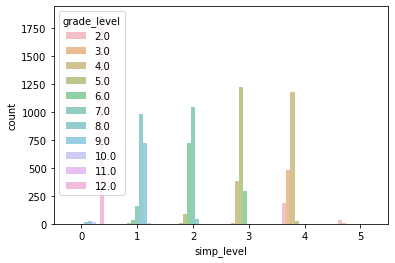

In [6]:
sns.countplot(data=df, x="simp_level", hue="grade_level", dodge=True, alpha=0.6)

In [138]:
from numpy import dtype


df2 = df.groupby('simp_level')['grade_level'].value_counts(normalize=False).rename('counts').reset_index(name='counts')
df2.simp_level = df2.simp_level.astype('int8')
df2.grade_level = df2.grade_level.astype('int8')
df2 = df2.set_index('simp_level')
df2

,grade_level,counts
simp_level,,
0,12,1853
0,9,25
0,10,16
0,8,14
0,11,2
0,6,1
1,8,980
1,9,725
1,7,158


[12, 9, 10, 8, 11, 6, 7, 5, 4, 3, 2]
0 X: [12  9 10  8 11  6] Y: [1853   25   16   14    2    1]
1 X: [ 8  9  7  6  5 10] Y: [980 725 158  39   4   4]
2 X: [7 6 5 8 4] Y: [1050  726   86   43    5]
3 X: [5 4 6 3 7] Y: [1224  386  292    6    2]
4 X: [4 3 2 5] Y: [1178  485  191   28]


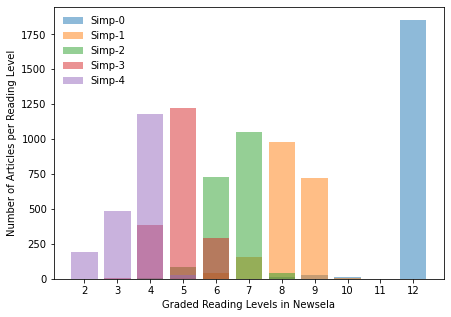

In [144]:
fig, axes = plt.subplots(1, 1, figsize=(7, 5))
# df_level_grade.plot(kind='bar')

x_vals = list(df2['grade_level'].unique())
print(x_vals)
# for simp_l in df_level_grade.index.unique():
for simp_l in range(5):
    dfs = df2.loc[simp_l]
    x = dfs['grade_level'].values
    y = dfs['counts'].values
    print(simp_l, 'X:', x, 'Y:', y)
    axes.bar(x = x, height = y, alpha=0.5, label=f'Simp-{simp_l}')
    
axes.set_xticks(x_vals)
axes.legend(frameon=False)
axes.set_xlabel('Graded Reading Levels in Newsela')
axes.set_ylabel('Number of Articles per Reading Level')
# fig.suptitle('Distribution of Graded Reading Levels Across Ta')

plt.savefig('plots/reading_level_vs_simp_level.png', dpi=300)
plt.savefig('plots/reading_level_vs_simp_level.pdf', dpi=300)

In [10]:
df.groupby(['split'])['slug'].unique()

split
test     [airstrikes-iraq, alienplanet-swim, asteroid-c...
train    [10dollarbill-woman, 17century-selfies, 20doll...
valid    [asian-modelminority, emergencyresponse-robots...
Name: slug, dtype: object

In [13]:
df['split'].value_counts()

train    9490
test       50
valid      25
Name: split, dtype: int64

In [14]:
9490 / 5

1898.0